In [1]:
import pandas as pd

In [2]:
tdf = pd.read_csv("Titanic_data.csv")

## Handling Duplicates

In [3]:
tdf.drop_duplicates(subset="Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
767,768,0,3,"Mangan, Miss. Mary",female,30.50,0,0,364850,7.7500,NaN,Q
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.50,0,0,2683,6.4375,NaN,C


In [4]:
tdf[tdf.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Handling Outliers

In [5]:
tdf.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
s = tdf.Age.describe()
s["25%"]

np.float64(20.125)

<Axes: >

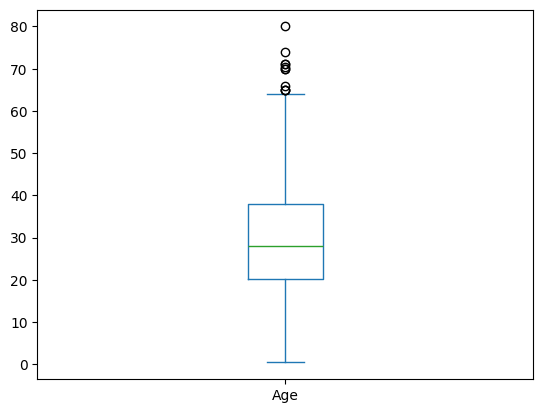

In [7]:
tdf.Age.plot.box()

In [8]:
Q1 = tdf.Age.quantile(q=0.25)
Q3 = tdf.Age.quantile(q=0.75)
IQR = Q3 - Q1
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

In [9]:
print(upper_limit , lower_limit)

64.8125 -6.6875


In [10]:
tdf[(tdf.Age > upper_limit) | (tdf.Age < lower_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


## Z-Score

In [11]:
!pip install scipy

In [12]:
from scipy.stats import zscore

In [13]:
zscore_age = abs(zscore(tdf.Age))
zscore_age

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: Age, Length: 891, dtype: float64

In [14]:
tdf.shape

(891, 12)

## Handling Incorrect Data

In [16]:
import numpy as np

# Create a dummy dataset
data = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'name': ['John', 'Jane', 'Bob', 'Alice', 'David'],
    'age': [25, -31, 42, 19, 37],
    'gender': ['M', 'F', 'M', 'F', 'Z'],
    'income': [50000, 70000, np.nan, '30000', 60000]
})
print("Dataset before Handling Incorrect Values")
print(data)

Dataset before Handling Incorrect Values
   id   name  age gender income
0   1   John   25      M  50000
1   2   Jane  -31      F  70000
2   3    Bob   42      M    NaN
3   4  Alice   19      F  30000
4   5  David   37      Z  60000


In [17]:
# Identify incorrect data
incorrect_age = data[(data['age'] <= 0) | (data['age'] > 100)]
incorrect_gender = data[~data['gender'].isin(['M', 'F'])]
incorrect_income = data[~data['income'].apply(lambda x: isinstance(x, (int, float)))]

In [18]:
# Delete incorrect data
data = data.drop(incorrect_age.index)
data = data.drop(incorrect_gender.index)
data = data.drop(incorrect_income.index)
data

,id,name,age,gender,income
0,1,John,25,M,50000
2,3,Bob,42,M,NaN


## Data Management

In [19]:
tdf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object